# Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
    
import warnings
warnings.filterwarnings('ignore')

import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from datetime import datetime

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

# Loading Data

In [3]:
def load_data (path='../dataset/'):
    global application_train, application_test, pos_cash
    application_train = pd.read_csv(path + 'application_train.csv')
    application_test = pd.read_csv(path + 'application_test.csv')
    pos_cash = pd.read_csv(path + 'POS_CASH_balance.csv')

    print('Done loading')

In [4]:
load_data()

Done loading


In [5]:
print("Merging TARGET with POS_CASH Table")
pos_cash_merge = application_train[['SK_ID_CURR', 'TARGET']].merge(pos_cash, on = 'SK_ID_CURR', how = 'right')

Merging TARGET with POS_CASH Table


# EDA

## 1. Shape and Description

In [6]:
pos_cash.shape

(8543375, 8)

In [7]:
pos_cash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8543375 entries, 0 to 8543374
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   MONTHS_BALANCE         int64  
 2   CNT_INSTALMENT         float64
 3   CNT_INSTALMENT_FUTURE  float64
 4   NAME_CONTRACT_STATUS   object 
 5   SK_DPD                 int64  
 6   SK_DPD_DEF             int64  
 7   SK_ID_CURR             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 521.4+ MB


In [8]:
pos_cash.columns

Index(['SK_ID_PREV', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD', 'SK_DPD_DEF',
       'SK_ID_CURR'],
      dtype='object')

- SK_ID_PREV: Mã của khoản tín dụng trước đó trong Home Credit liên quan đến khoản vay trong mẫu của chúng ta. (Một khoản vay trong mẫu của chúng ta có thể có 0, 1, 2 hoặc nhiều khoản vay trước đó tại Home Credit).

- SK_ID_CURR: Mã của khoản vay trong mẫu của chúng ta.

- MONTHS_BALANCE: Tháng của số dư tương đối với ngày nộp đơn (giá trị -1 có nghĩa là thông tin mới nhất về số dư, giá trị 0 có nghĩa là thông tin tại thời điểm nộp đơn — thường thì giá trị này sẽ giống với -1 vì nhiều ngân hàng không cập nhật thông tin thường xuyên vào Cơ quan tín dụng).

- CNT_INSTALMENT: Số kỳ hạn của tín dụng trước đó (có thể thay đổi theo thời gian).

- CNT_INSTALMENT_FUTURE: Số kỳ còn lại để thanh toán đối với tín dụng trước đó.

- NAME_CONTRACT_STATUS: Trạng thái hợp đồng trong tháng.

- SK_DPD: Số ngày quá hạn trong tháng của tín dụng trước đó.

- SK_DPD_DEF: Số ngày quá hạn trong tháng với dung sai (bỏ qua các khoản vay có số dư thấp) của tín dụng trước đó.


In [9]:
pos_cash.head()

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
0,1803195,-31,48.0,45.0,Active,0,0,185279
1,1803195,-17,48.0,31.0,Active,0,0,185279
2,1803195,-21,48.0,35.0,Active,0,0,185279
3,1803195,-8,48.0,21.0,Active,0,0,185279
4,1803195,-4,48.0,17.0,Active,0,0,185279


In [10]:
print(f'Shape of pos_cash: {pos_cash.shape}')
print('-' * 50)
print(f'Unique SK_ID_PREV in pos_cash: {pos_cash['SK_ID_PREV'].nunique()}')
print(f'Unique SK_ID_CURR in pos_cash: {pos_cash['SK_ID_CURR'].nunique()}')
print(f'Unique SK_ID_CURR of pos_cash in application_train: {application_train[application_train["SK_ID_CURR"].isin(pos_cash["SK_ID_CURR"])].shape[0]}')
print(f'Unique SK_ID_CURR of pos_cash in application_test: {application_test[application_test["SK_ID_CURR"].isin(pos_cash["SK_ID_CURR"])].shape[0]}') 
print('-' * 50)
print(f'Unique SK_ID_CURR in application_train: {application_train["SK_ID_CURR"].nunique()}')
print(f'Unique SK_ID_CURR in application_test: {application_test["SK_ID_CURR"].nunique()}')
print('-' * 50)
display(pos_cash.head())

Shape of pos_cash: (8543375, 8)
--------------------------------------------------
Unique SK_ID_PREV in pos_cash: 800337
Unique SK_ID_CURR in pos_cash: 289444


Unique SK_ID_CURR of pos_cash in application_train: 231531
Unique SK_ID_CURR of pos_cash in application_test: 57913
--------------------------------------------------
Unique SK_ID_CURR in application_train: 246009
Unique SK_ID_CURR in application_test: 61502
--------------------------------------------------


,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
0,1803195,-31,48.0,45.0,Active,0,0,185279
1,1803195,-17,48.0,31.0,Active,0,0,185279
2,1803195,-21,48.0,35.0,Active,0,0,185279
3,1803195,-8,48.0,21.0,Active,0,0,185279
4,1803195,-4,48.0,17.0,Active,0,0,185279


In [11]:
for col in pos_cash.columns:
    if pos_cash[col].dtype == 'object':
        print(f'Unique values in {col}: {pos_cash[col].nunique()}')
        print(f'{pos_cash[col].unique()}')
        print('-' * 50)

Unique values in NAME_CONTRACT_STATUS: 9
['Active' 'Completed' 'Approved' 'Signed' 'Returned to the store' 'Demand'
 'XNA' 'Canceled' 'Amortized debt']
--------------------------------------------------


# 2. Univariate Analysis

# 2.1 Categorical Variables

In [12]:
def plot_object_col_num(data, title, col, tight_layout=True, figsize= (10, 5), rotation=0):
    plt.figure(figsize=figsize)
    sns.countplot(data[col], order=data[col].value_counts().index)
    plt.title(title)
    plt.xticks(rotation=rotation)
    if tight_layout:
        plt.tight_layout()
    plt.show()

def plot_object_col_percent(data, title, col, tight_layout=True, figsize= (10, 5), rotation=0):
    plt.figure(figsize=figsize)
    sns.barplot(data[col].value_counts(normalize=True).values*100, orient='h')
    plt.title(title)
    plt.xticks(rotation=rotation)
    plt.yticks(range(len(data[col].value_counts().index)), data[col].value_counts(normalize=True).index)
    plt.xlabel('Percent')
    if tight_layout:
        plt.tight_layout()
    plt.show()

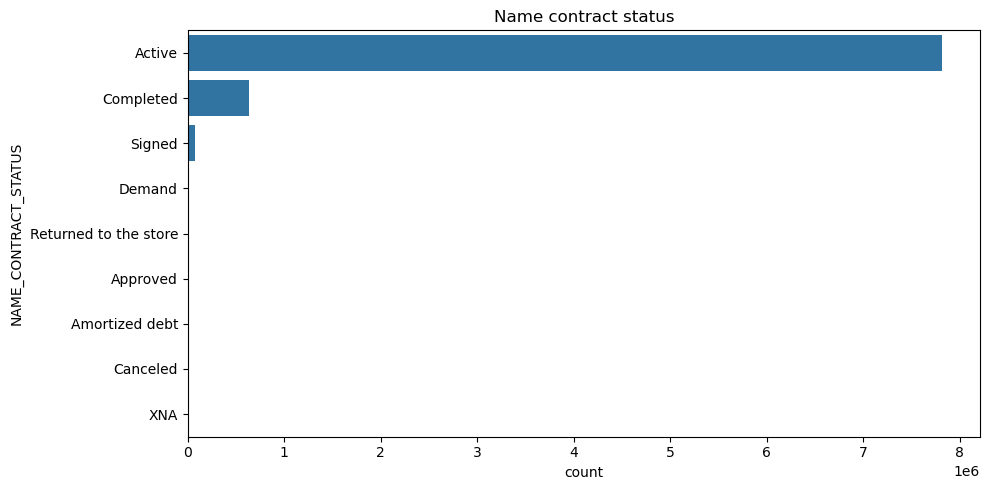

In [13]:
plot_object_col_num(pos_cash, 'Name contract status', 'NAME_CONTRACT_STATUS')

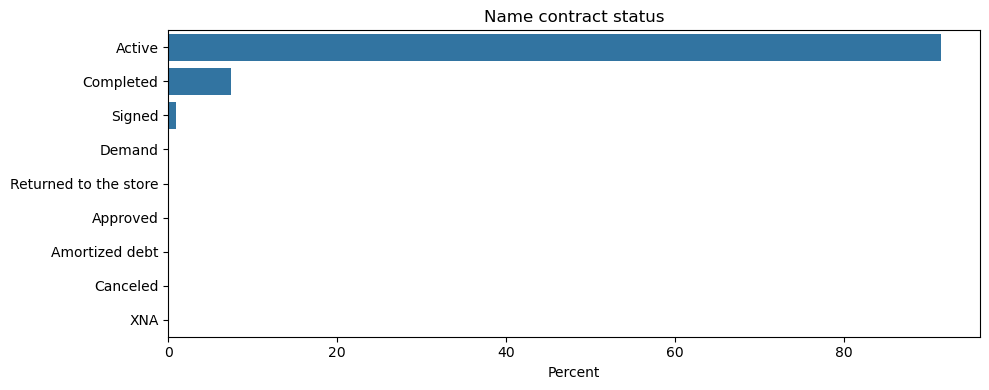

In [14]:
plot_object_col_percent(pos_cash, 'Name contract status', 'NAME_CONTRACT_STATUS', figsize=(10, 4))

### Comment
- Most of the NAME_CONTRACT_STATUS are Active (>85%) or Completed (~10%). Maybe combine Active and Completed into 1 group and other value into 1 categories Others

## 2.2 Numerical Data

In [15]:
categorical_col = pos_cash.select_dtypes('object').columns.to_list()
numerical_col = [col for col in pos_cash.columns if col not in categorical_col and col not in ['SK_ID_CURR', 'SK_ID_PREV']]

In [16]:
# describe numerical columns except SK_ID_CURR and SK_ID_BUREAU
with pd.option_context('display.float_format', '{:.1f}'.format):
    print(pos_cash.drop(['SK_ID_CURR', 'SK_ID_PREV'], axis=1).describe())

       MONTHS_BALANCE  CNT_INSTALMENT  CNT_INSTALMENT_FUTURE    SK_DPD  \
count       8543375.0       8521512.0              8521497.0 8543375.0   
mean            -34.9            17.0                   10.5      11.9   
std              26.1            12.0                   11.1     134.0   
min             -96.0             1.0                    0.0       0.0   
25%             -54.0            10.0                    3.0       0.0   
50%             -28.0            12.0                    7.0       0.0   
75%             -13.0            24.0                   14.0       0.0   
max              -1.0            84.0                   84.0    4231.0   

       SK_DPD_DEF  
count   8543375.0  
mean          0.6  
std          30.4  
min           0.0  
25%           0.0  
50%           0.0  
75%           0.0  
max        3373.0  


### Comment
1. **MONTHS_BALANCE**: Tháng của số dư tương đối với ngày nộp đơn (giá trị -1 có nghĩa là thông tin mới nhất về số dư, giá trị 0 có nghĩa là thông tin tại thời điểm nộp đơn — thường thì giá trị này sẽ giống với -1 vì nhiều ngân hàng không cập nhật thông tin thường xuyên vào Cơ quan tín dụng).
    - Có khoản vay sớm nhất từ 8 năm trước

2. CNT_INSTALMENT: Số kỳ hạn của tín dụng trước đó (có thể thay đổi theo thời gian).
    - Kì hạn nhỏ nhất là 1 kì -> 84 kì

3.  CNT_INSTALMENT_FUTURE: Số kỳ còn lại để thanh toán đối với tín dụng trước đó.
    - 0: đã trả xong -> Closed

4. SK_DPD: Số ngày quá hạn trong tháng của tín dụng trước đó.
    - Có khoản vay quá hạn 4231 ngày (11 năm) -> Chuyển thành NaN những giá trị quá 8 năm vì khoản vay sớm nhất từ 8 năm trước

5. SK_DPD_DEF: Số ngày quá hạn trong tháng với dung sai (bỏ qua các khoản vay có số dư thấp) của tín dụng trước đó.
    - 0: 
    - 3373 -> lỗi


In [28]:
numeric_columns = pos_cash_merge.select_dtypes(include=['number']).columns
numeric_columns

Index(['SK_ID_CURR', 'TARGET', 'SK_ID_PREV', 'MONTHS_BALANCE',
       'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF'],
      dtype='object')

In [29]:
pos_cash_merged = pos_cash_merge.groupby('SK_ID_PREV')[numeric_columns].mean()

**Distribution of Continuous Vairable CNT_INSTALMENT_FUTURE**

In [23]:
def plot_box_plot(data, column_name, scale_limits = None, figsize = (20,8), histogram = True, log_scale = False):
    data_to_plot = data.copy()
    if scale_limits:
        data_to_plot[column_name] = data[column_name][(data[column_name] > scale_limits[0]) & (data[column_name] < scale_limits[1])]
    plt.figure(figsize = figsize)
    sns.set_style('whitegrid')
    sns.boxplot(x='TARGET', y=column_name, data=data_to_plot)
    plt.title("Box-Plot of {}".format(column_name))
    if log_scale:
        plt.yscale('log')
        plt.ylabel(f'{column_name} (log Scale)')
    plt.show()

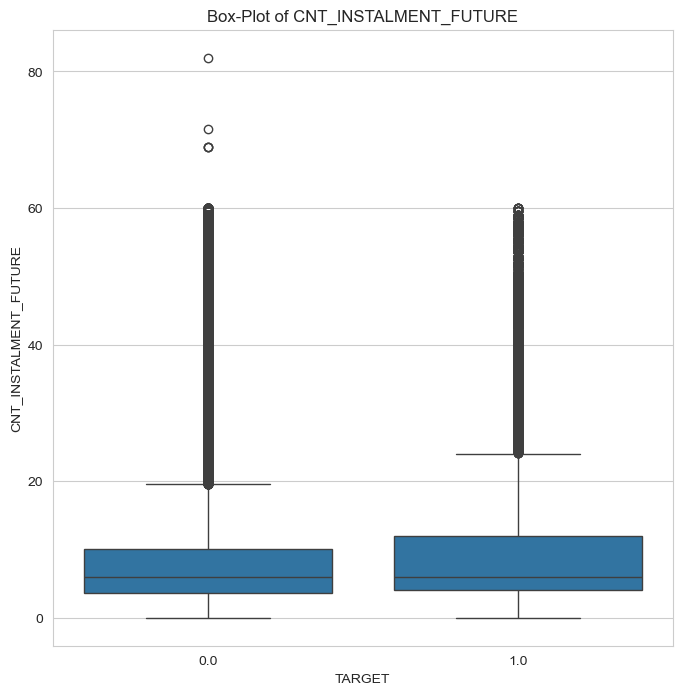

In [30]:
plot_box_plot(pos_cash_merged, 'CNT_INSTALMENT_FUTURE', figsize = (8,8))
del pos_cash_merged

#### Comment:
- THe percentile values > 50% for Defaulters are usually higher than those of Non-Defaulters. 
- Upper limit whisker for Defaulters is higher than that of Non-Defaulters. 
- This suggests that the Defaulters tend to have more number of Installments remaining on their previous credits as compared to Non-Defaulters.


# 3. Null Values

In [31]:
def nan_df_create(data):
    nan_percentages = data.isna().sum() * 100 / len(data)
    df = pd.DataFrame({'column' : nan_percentages.index, 'percent' : nan_percentages.values})

    #sorting the dataframe by decreasing order
    df = df.sort_values(by = 'percent', ascending = False)
    return df

In [32]:
def plot_nan(df_nan, title, figsize = (20,8), tight_layout = True, grid = False, rotation = 90):
    if df_nan[df_nan['percent'] != 0].shape[0] != 0:
        print(f'{df_nan[df_nan['percent'] != 0].shape[0]} columns have missing values')
        plt.figure(figsize = figsize, tight_layout = tight_layout)
        sns.barplot(x = 'column', y = 'percent', data = df_nan[df_nan['percent'] != 0])
        plt.title(f'Percentage of missing values in each column of {title}')
        plt.xlabel('Columns')
        plt.ylabel('Percentage of missing values')
        plt.xticks(rotation = rotation)
        plt.grid(grid)
        plt.show()
    else:
        print('No missing values in the dataframe')

In [33]:
print("Columns with NaN values and their percentages:")
POS_CASH_nan = nan_df_create(pos_cash)
display(POS_CASH_nan[POS_CASH_nan.percent != 0])
print('-'*100)
del POS_CASH_nan

Columns with NaN values and their percentages:


,column,percent
3,CNT_INSTALMENT_FUTURE,0.256081
2,CNT_INSTALMENT,0.255906


----------------------------------------------------------------------------------------------------


### Comment
Không có quá nhiều giá trị nan

# 4. Others problems/ Outliers

## 4.1 CNT_INSTALMENT_FUTURE = 0 nhưng status != Close? 

In [34]:
pos_cash.loc[(pos_cash['CNT_INSTALMENT_FUTURE'] == 0) & (pos_cash['NAME_CONTRACT_STATUS'] == 'Active')]


,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
46,2671131,-77,6.0,0.0,Active,0,0,140883
139,1980689,-83,10.0,0.0,Active,58,0,272857
141,1980689,-82,10.0,0.0,Active,88,0,272857
145,1980689,-77,10.0,0.0,Active,240,0,272857
146,1980689,-80,10.0,0.0,Active,150,0,272857
...,...,...,...,...,...,...,...,...
8543074,2239952,-7,4.0,0.0,Active,0,0,195541
8543102,1414827,-96,6.0,0.0,Active,0,0,204798
8543256,1364356,-96,11.0,0.0,Active,0,0,133483
8543304,2755201,-6,2.0,0.0,Active,0,0,288220


In [35]:
pos_cash.shape

(8543375, 8)

## 4.3 CNT_INSTALMENT_FUTURE > CNT_INSTALMENT: Vô lý vì số  kì còn lại cần trả lớn hơn số kì thực tế vay

In [36]:
df = pos_cash[pos_cash['CNT_INSTALMENT'] < pos_cash['CNT_INSTALMENT_FUTURE']]
df

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
241,1928179,-55,11.0,12.0,Active,0,0,109727
518,2702895,-62,20.0,23.0,Active,0,0,281161
530,2702895,-60,20.0,21.0,Active,0,0,281161
543,2702895,-61,20.0,22.0,Active,0,0,281161
3597,2824585,-38,6.0,7.0,Active,0,0,141166
...,...,...,...,...,...,...,...,...
8363816,2704473,-51,4.0,6.0,Signed,0,0,52593
8363819,2704473,-53,4.0,6.0,Signed,0,0,52593
8363822,2704473,-52,4.0,6.0,Signed,0,0,52593
8378590,1082263,-52,10.0,11.0,Active,0,0,187254


In [37]:
#df.loc[df['CNT_INSTALMENT_FUTURE'] > df['CNT_INSTALMENT'], 'CNT_INSTALMENT_FUTURE'] = np.nan

## 4.4 SKD_DPD và SKD_DPD_DEF vượt mức pickleball -> chuyển hết về NaN

In [38]:
pos_cash.loc[pos_cash['SK_DPD'] > 2920] 

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
326989,2100372,-2,8.0,0.0,Completed,2945,0,178235
422452,1937260,-12,24.0,0.0,Active,3472,0,208132
422454,1937260,-20,24.0,0.0,Active,3227,0,208132
422463,1937260,-25,24.0,0.0,Active,3076,0,208132
422468,1937260,-27,24.0,0.0,Active,3015,0,208132
...,...,...,...,...,...,...,...,...
8541532,1257852,-8,10.0,0.0,Active,2969,0,209628
8541534,1257852,-7,10.0,0.0,Active,2999,0,209628
8541535,1257852,-2,10.0,0.0,Active,3152,0,209628
8541536,1257852,-1,10.0,0.0,Active,3183,0,209628


In [39]:
pos_cash.loc[pos_cash['SK_DPD_DEF'] > 2920]

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
2025948,1915099,-9,7.0,0.0,Demand,2944,2944,233118
2025949,1915099,-6,7.0,0.0,Demand,3036,3036,233118
2025950,1915099,-7,7.0,0.0,Demand,3006,3006,233118
2025994,1915099,-8,7.0,0.0,Demand,2975,2975,233118
2025995,1915099,-2,7.0,0.0,Demand,3159,3159,233118
...,...,...,...,...,...,...,...,...
8275975,1385544,-5,9.0,0.0,Demand,3117,3117,182058
8275976,1385544,-7,9.0,0.0,Demand,3056,3056,182058
8275977,1385544,-2,9.0,0.0,Demand,3209,3209,182058
8275978,1385544,-8,9.0,0.0,Demand,3025,3025,182058


## 4.5 Các vấn đề liên quan tới Status

In [40]:
pos_cash.loc[(pos_cash['NAME_CONTRACT_STATUS'] == 'Completed') & (pos_cash['SK_DPD_DEF'] > 0)]


,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
3893923,1332308,-26,12.0,7.0,Completed,10,10,36265
6292126,2570081,-37,48.0,0.0,Completed,61,61,174364
6663118,1322820,-48,6.0,0.0,Completed,847,847,249197
6663125,1322820,-15,6.0,0.0,Completed,2041,2041,249197
6663126,1322820,-31,6.0,0.0,Completed,1554,1554,249197
...,...,...,...,...,...,...,...,...
7707138,2478336,-7,6.0,0.0,Completed,2434,2434,41380
7707139,2478336,-10,6.0,0.0,Completed,2345,2345,41380
7707140,2478336,-9,6.0,0.0,Completed,2373,2373,41380
7707141,2478336,-8,6.0,0.0,Completed,2404,2404,41380


In [41]:
pos_cash.loc[(pos_cash['NAME_CONTRACT_STATUS'] == 'Completed') & (pos_cash['CNT_INSTALMENT_FUTURE'] > 0)]

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
2004460,2408885,-8,8.0,8.0,Completed,0,0,23126
3893923,1332308,-26,12.0,7.0,Completed,10,10,36265
6860002,1134377,-95,10.0,10.0,Completed,0,0,39270


# 5. Correlation

In [42]:
def plot_phik_matrix(data, categorical_columns, figsize = (20,20), mask_upper = True, tight_layout = True, 
                     linewidth = 0.1, fontsize = 10, cmap = 'Blues', show_target_top_corr = True, target_top_columns = 10):
    
    #first fetching only the categorical features
    data_for_phik = data[categorical_columns].astype('object')
    phik_matrix = data_for_phik.phik_matrix()
    
    print('-'*100)
    
    if mask_upper:
        mask_array = np.ones(phik_matrix.shape)
        mask_array = np.triu(mask_array)
    else:
        mask_array = np.zeros(phik_matrix.shape)
        
    plt.figure(figsize = figsize, tight_layout = tight_layout)
    sns.heatmap(phik_matrix, annot = False, mask = mask_array, linewidth = linewidth, cmap = cmap)
    plt.xticks(rotation = 90, fontsize = fontsize)
    plt.yticks(rotation = 0, fontsize = fontsize)
    plt.title("Phi-K Correlation Heatmap for Categorical Features")
    plt.show()
    print("-"*100)

    if show_target_top_corr:
        #Seeing the top columns with highest correlation with the target variable in application_train
        print("Categories with highest values of Phi-K Correlation value with Target Variable are:")
        phik_df = pd.DataFrame({'Column Name' : phik_matrix.TARGET.index[1:], 'Phik-Correlation' : phik_matrix.TARGET.values[1:]})
        phik_df = phik_df.sort_values(by = 'Phik-Correlation', ascending = False)
        display(phik_df.head(target_top_columns))
        print("-"*100) 

----------------------------------------------------------------------------------------------------


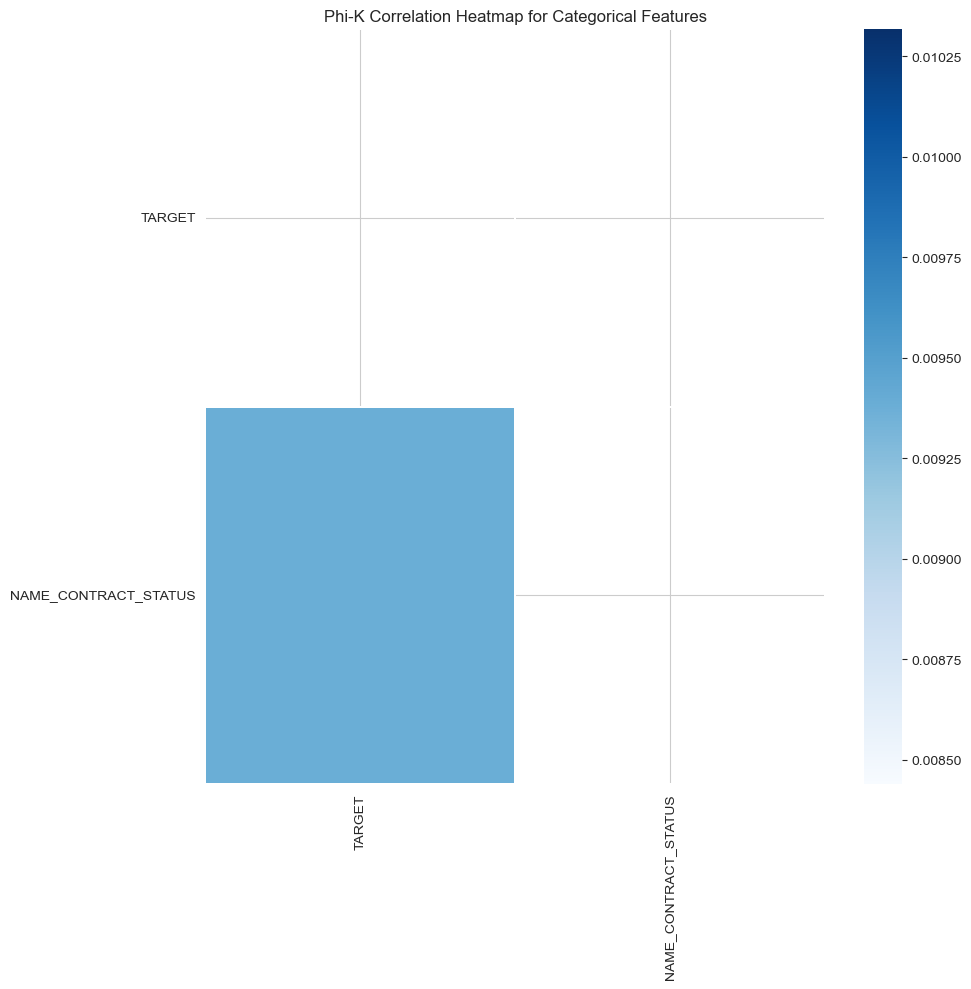

----------------------------------------------------------------------------------------------------
Categories with highest values of Phi-K Correlation value with Target Variable are:


,Column Name,Phik-Correlation
0,NAME_CONTRACT_STATUS,0.009378


----------------------------------------------------------------------------------------------------


In [45]:
cols_for_phik = ['TARGET', 'NAME_CONTRACT_STATUS']
plot_phik_matrix(pos_cash_merge, cols_for_phik,  figsize = (10,10))

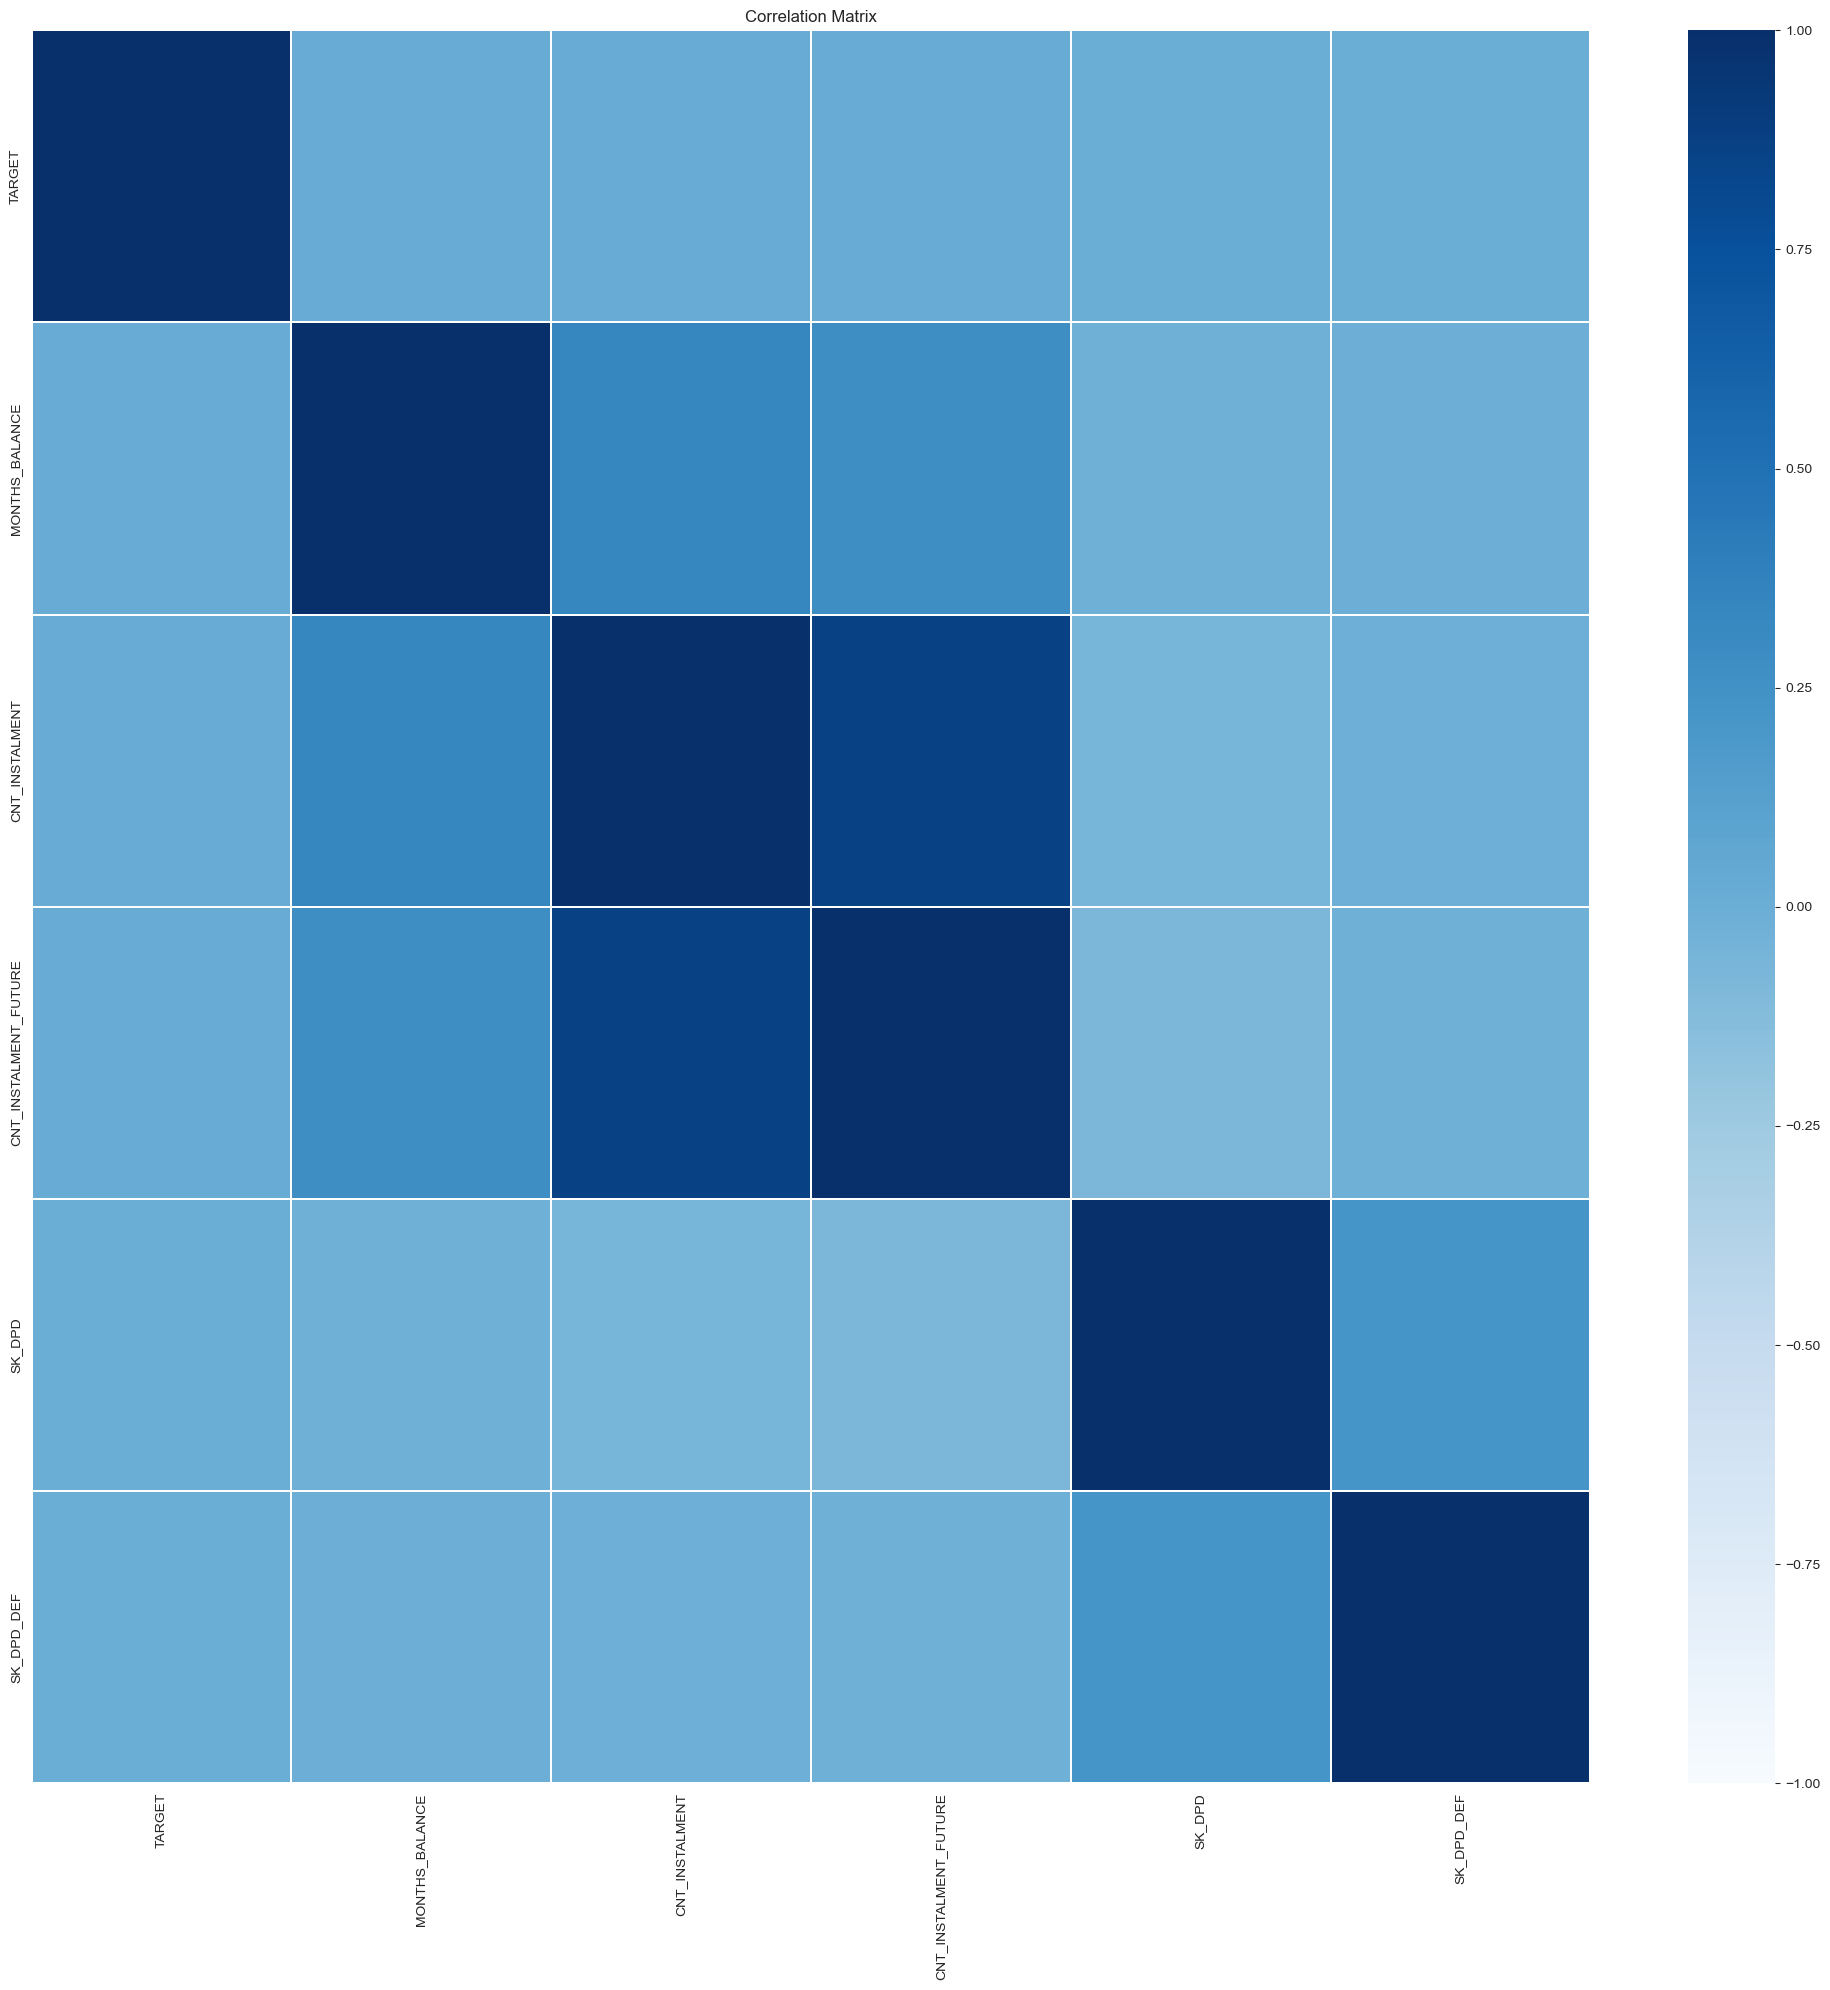

In [44]:
def correlation_matrix(data, columns_to_include, cmap='Blues', figsize=(20, 20)):
    data_filtered = data[columns_to_include]
    numeric_data = data_filtered.select_dtypes(include=['number', 'float', 'int'])
    corr_data = numeric_data.corr()
    plt.figure(figsize=figsize, tight_layout = True)
    sns.heatmap(corr_data, annot=False, cmap=cmap, vmin=-1, vmax=1, linewidths=0.1)
    plt.xticks(rotation = 90, fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.title("Correlation Matrix")
    plt.show()
    return corr_data
cols_for_corr = ['TARGET','MONTHS_BALANCE', 'CNT_INSTALMENT','CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF']
corr_mat = correlation_matrix(pos_cash_merge, cols_for_corr, cmap='Blues')

### Comment
- Correlation between the fetures:
    - Moderately correlated: CNT_INSTALMENT and CNT_INSTALMENT_FUTURE.-> can make new feature from this set
    - The correlation of features with Target is very low, this shows the absence of a linear relationship between the feature and the target variable

# Overall Comment

- Grouped NAME_CONTRACT_STATUS in 3 categories instead of 9: Active (Active + Demand), Completed ('Completed', 'Canceled'), and Others ('Approved' 'Signed' 'Returned to the store' 'XNA' 'Amortized debt)
- Chuyển các pos_cash.loc[(pos_cash['CNT_INSTALMENT_FUTURE'] == 0) & (pos_cash['NAME_CONTRACT_STATUS'] == 'Active')] -> NaN hoặc Completed
- các giá trị pos_cash[pos_cash['CNT_INSTALMENT'] < pos_cash['CNT_INSTALMENT_FUTURE']] -> drop hoặc chuyển về NaN
- pos_cash.loc[pos_cash['SK_DPD'] > 2920] -> drop hoặc chuyển về NaN
- pos_cash.loc[pos_cash['SK_DPD_DEF'] > 2920] -> drop hoặc chuyển về NaN
- pos_cash.loc[(pos_cash['NAME_CONTRACT_STATUS'] == 'Completed') & (pos_cash['CNT_INSTALMENT_FUTURE'] > 0)] -> drop 